In [13]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [8]:
df = pd.read_csv("/content/credit_risk_dataset.csv")

In [9]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
# Read Our Edgelist
us_graph = nx.from_pandas_edgelist(df,source="person_home_ownership",target="loan_intent")

In [11]:
type(us_graph)

networkx.classes.graph.Graph

In [18]:
# Check All Nodes/Object/People
us_graph.nodes()

NodeView(('RENT', 'PERSONAL', 'OWN', 'EDUCATION', 'MORTGAGE', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION', 'OTHER'))

In [19]:
len(us_graph.nodes())

10

**Check All Edges/Connections**

In [20]:
len(us_graph.edges())

24

In [24]:
us_graph.add_edge("DOWNPAYMENT","MARRIAGE")

In [25]:
us_graph.nodes()

NodeView(('RENT', 'PERSONAL', 'OWN', 'EDUCATION', 'MORTGAGE', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION', 'OTHER', 'DOWNPAYMENT', 'MARRIAGE'))

**Visualization**

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

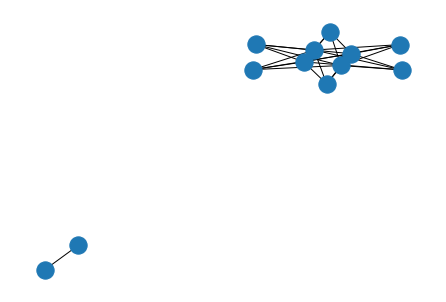

In [27]:
nx.draw(us_graph)

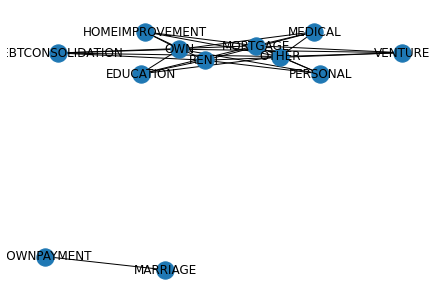

In [28]:
nx.draw(us_graph,with_labels=True)

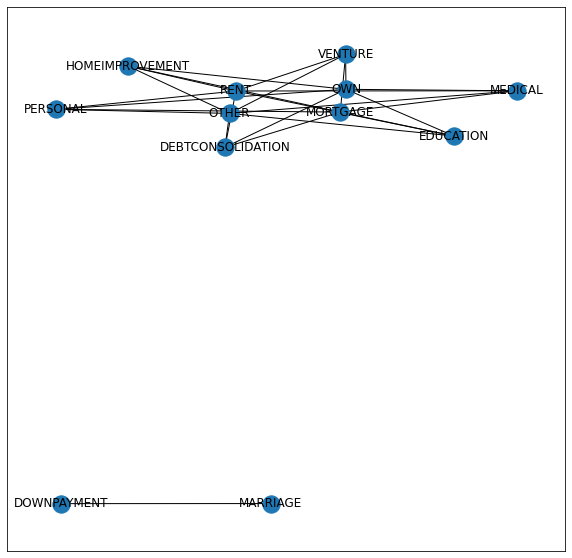

In [29]:
plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()

**Analysis**

In [30]:
# General Connection
nx.degree(us_graph)

DegreeView({'RENT': 6, 'PERSONAL': 4, 'OWN': 6, 'EDUCATION': 4, 'MORTGAGE': 6, 'MEDICAL': 4, 'VENTURE': 4, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 4, 'OTHER': 6, 'DOWNPAYMENT': 1, 'MARRIAGE': 1})

**Most Influential**

**Degree Centrality**

In [31]:
nx.degree_centrality(us_graph)

{'RENT': 0.5454545454545454,
 'PERSONAL': 0.36363636363636365,
 'OWN': 0.5454545454545454,
 'EDUCATION': 0.36363636363636365,
 'MORTGAGE': 0.5454545454545454,
 'MEDICAL': 0.36363636363636365,
 'VENTURE': 0.36363636363636365,
 'HOMEIMPROVEMENT': 0.36363636363636365,
 'DEBTCONSOLIDATION': 0.36363636363636365,
 'OTHER': 0.5454545454545454,
 'DOWNPAYMENT': 0.09090909090909091,
 'MARRIAGE': 0.09090909090909091}

In [32]:
sorted(nx.degree_centrality(us_graph).values())

[0.09090909090909091,
 0.09090909090909091,
 0.36363636363636365,
 0.36363636363636365,
 0.36363636363636365,
 0.36363636363636365,
 0.36363636363636365,
 0.36363636363636365,
 0.5454545454545454,
 0.5454545454545454,
 0.5454545454545454,
 0.5454545454545454]

In [33]:
most_influential = nx.degree_centrality(us_graph)

In [34]:
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])

RENT 0.5454545454545454
OWN 0.5454545454545454
MORTGAGE 0.5454545454545454
OTHER 0.5454545454545454
PERSONAL 0.36363636363636365
EDUCATION 0.36363636363636365
MEDICAL 0.36363636363636365
VENTURE 0.36363636363636365
HOMEIMPROVEMENT 0.36363636363636365
DEBTCONSOLIDATION 0.36363636363636365
DOWNPAYMENT 0.09090909090909091
MARRIAGE 0.09090909090909091


**Eigenvector Centyrality**

In [42]:
### Most Important Connection
nx.eigenvector_centrality

<function networkx.algorithms.centrality.eigenvector.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)>

In [36]:
nx.eigenvector_centrality(us_graph)

{'RENT': 0.35355388897718293,
 'PERSONAL': 0.2886747276654814,
 'OWN': 0.35355388897718293,
 'EDUCATION': 0.2886747276654814,
 'MORTGAGE': 0.35355388897718293,
 'MEDICAL': 0.2886747276654814,
 'VENTURE': 0.2886747276654814,
 'HOMEIMPROVEMENT': 0.2886747276654814,
 'DEBTCONSOLIDATION': 0.2886747276654814,
 'OTHER': 0.35355388897718293,
 'DOWNPAYMENT': 6.592327167565238e-14,
 'MARRIAGE': 6.592327167565238e-14}

In [37]:
most_important_link = nx.eigenvector_centrality(us_graph)

In [38]:
for w in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(w, most_important_link[w])


RENT 0.35355388897718293
OWN 0.35355388897718293
MORTGAGE 0.35355388897718293
OTHER 0.35355388897718293
PERSONAL 0.2886747276654814
EDUCATION 0.2886747276654814
MEDICAL 0.2886747276654814
VENTURE 0.2886747276654814
HOMEIMPROVEMENT 0.2886747276654814
DEBTCONSOLIDATION 0.2886747276654814
DOWNPAYMENT 6.592327167565238e-14
MARRIAGE 6.592327167565238e-14


In [46]:
# What is the shortest connection 
nx.shortest_path

<function networkx.algorithms.shortest_paths.generic.shortest_path(G, source=None, target=None, weight=None, method='dijkstra')>

In [43]:
nx.eigenvector_centrality(us_graph)

{'RENT': 0.35355388897718293,
 'PERSONAL': 0.2886747276654814,
 'OWN': 0.35355388897718293,
 'EDUCATION': 0.2886747276654814,
 'MORTGAGE': 0.35355388897718293,
 'MEDICAL': 0.2886747276654814,
 'VENTURE': 0.2886747276654814,
 'HOMEIMPROVEMENT': 0.2886747276654814,
 'DEBTCONSOLIDATION': 0.2886747276654814,
 'OTHER': 0.35355388897718293,
 'DOWNPAYMENT': 6.592327167565238e-14,
 'MARRIAGE': 6.592327167565238e-14}

In [44]:
most_important_link = nx.eigenvector_centrality(us_graph)

In [45]:
#@title Default title text
for w in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(w, most_important_link[w])

RENT 0.35355388897718293
OWN 0.35355388897718293
MORTGAGE 0.35355388897718293
OTHER 0.35355388897718293
PERSONAL 0.2886747276654814
EDUCATION 0.2886747276654814
MEDICAL 0.2886747276654814
VENTURE 0.2886747276654814
HOMEIMPROVEMENT 0.2886747276654814
DEBTCONSOLIDATION 0.2886747276654814
DOWNPAYMENT 6.592327167565238e-14
MARRIAGE 6.592327167565238e-14


In [47]:
# What is the shortest connection 
nx.shortest_path

<function networkx.algorithms.shortest_paths.generic.shortest_path(G, source=None, target=None, weight=None, method='dijkstra')>

In [50]:
nx.shortest_path(us_graph,"RENT","MORTGAGE")

['RENT', 'MEDICAL', 'MORTGAGE']

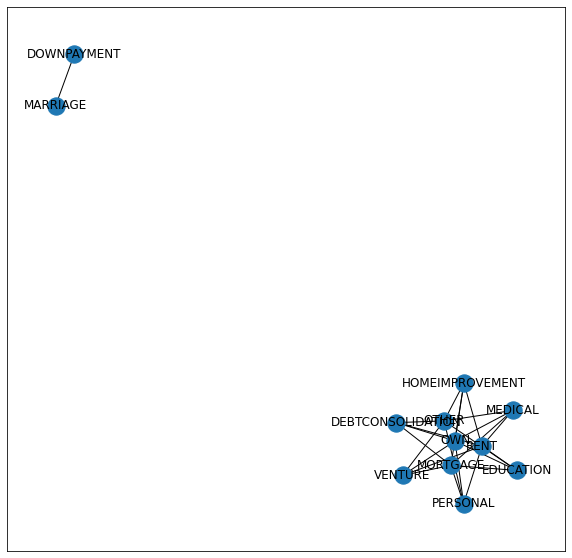

In [52]:
plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()

**Betweeness Centrality**

In [53]:
nx.betweenness_centrality(us_graph)

{'RENT': 0.06818181818181818,
 'PERSONAL': 0.01818181818181818,
 'OWN': 0.06818181818181818,
 'EDUCATION': 0.01818181818181818,
 'MORTGAGE': 0.06818181818181818,
 'MEDICAL': 0.01818181818181818,
 'VENTURE': 0.01818181818181818,
 'HOMEIMPROVEMENT': 0.01818181818181818,
 'DEBTCONSOLIDATION': 0.01818181818181818,
 'OTHER': 0.06818181818181818,
 'DOWNPAYMENT': 0.0,
 'MARRIAGE': 0.0}

In [54]:
best_connector = nx.betweenness_centrality(us_graph)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

RENT 0.06818181818181818
OWN 0.06818181818181818
MORTGAGE 0.06818181818181818
OTHER 0.06818181818181818
PERSONAL 0.01818181818181818
EDUCATION 0.01818181818181818
MEDICAL 0.01818181818181818
VENTURE 0.01818181818181818
HOMEIMPROVEMENT 0.01818181818181818
DEBTCONSOLIDATION 0.01818181818181818
DOWNPAYMENT 0.0
MARRIAGE 0.0


In [55]:
group1 = nx.bfs_tree(us_graph,"RENT")

In [56]:
group2 = nx.bfs_tree(us_graph,"OWN")

In [57]:
group3 = nx.bfs_tree(us_graph,"HOMEIMPROVEMENT")

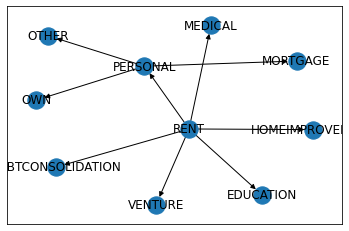

In [58]:
nx.draw_networkx(group1)

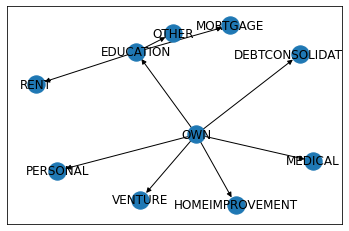

In [59]:
nx.draw_networkx(group2)

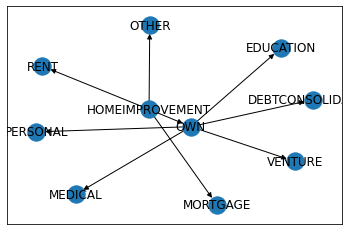

In [60]:
nx.draw_networkx(group3)

In [61]:
nx.node_connected_component(us_graph,"VENTURE")

{'DEBTCONSOLIDATION',
 'EDUCATION',
 'HOMEIMPROVEMENT',
 'MEDICAL',
 'MORTGAGE',
 'OTHER',
 'OWN',
 'PERSONAL',
 'RENT',
 'VENTURE'}

In [62]:
### Association 
nx.clustering

<function networkx.algorithms.cluster.clustering(G, nodes=None, weight=None)>

In [63]:
nx.clustering(us_graph)

{'RENT': 0,
 'PERSONAL': 0,
 'OWN': 0,
 'EDUCATION': 0,
 'MORTGAGE': 0,
 'MEDICAL': 0,
 'VENTURE': 0,
 'HOMEIMPROVEMENT': 0,
 'DEBTCONSOLIDATION': 0,
 'OTHER': 0,
 'DOWNPAYMENT': 0,
 'MARRIAGE': 0}

In [65]:
# Load data into DataFrame
df = pd.read_csv("/content/credit_risk_dataset.csv")

# Create empty graph
G = nx.Graph()

# Add nodes to graph
nodes = ["credit_score", "income", "employment_history", "debt-to-income_ratio", "age", "location", "loan_term"]
for n in nodes:
    G.add_node(n)

# Add edges to graph
G.add_edge("income", "credit_score")
G.add_edge("employment_history", "credit_score")
G.add_edge("income", "debt-to-income_ratio")
G.add_edge("debt-to-income_ratio", "loan_term")
G.add_edge("age", "location")

# Calculate centrality
centrality = nx.betweenness_centrality(G)
print("Node centrality:", centrality)

# Perform community detection
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
print("Communities:", communities)


Node centrality: {'credit_score': 0.2, 'income': 0.26666666666666666, 'employment_history': 0.0, 'debt-to-income_ratio': 0.2, 'age': 0.0, 'location': 0.0, 'loan_term': 0.0}
Communities: [frozenset({'income', 'employment_history', 'credit_score'}), frozenset({'age', 'location'}), frozenset({'loan_term', 'debt-to-income_ratio'})]
